### Bài tập thực hành 1

Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu hành vi của khách hàng lấy tại
https://www.kaggle.com/code/arezalo/customer-behaviour-prediction-naive-bayes

#### 1. Import thư viện và nạp dữ liệu vào notebook

In [47]:
#Importing the Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
data = pd.read_csv('Dataset/Customer_Behaviour.csv', encoding='latin-1')
#display the first 5 rows
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### 2. Xử lý dữ liệu trước khi xây dựng mô hình từ dữ liệu

In [48]:
# Drop the columns not needed for modeling
data = data.drop(columns=['User ID'], axis=1)

# Encode the categorical column (Gender)
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# Kiểm tra lại dữ liệu sau khi xử lý
data.head()


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


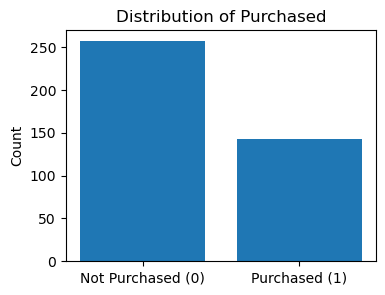

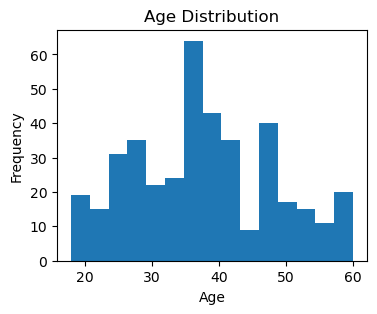

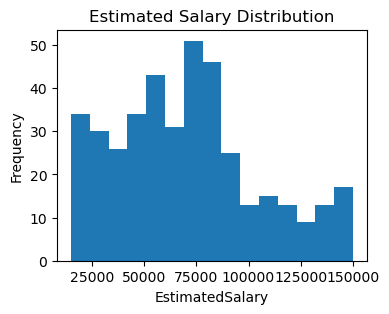

In [49]:
# 2.1 – Biểu đồ phân bố biến mục tiêu (Purchased)

purchase_counts = data['Purchased'].value_counts().sort_index()

plt.figure(figsize=(4,3))
plt.bar(['Not Purchased (0)', 'Purchased (1)'], purchase_counts.values)
plt.title('Distribution of Purchased')
plt.ylabel('Count')
plt.show()

# 2.2 – Biểu đồ phân bố tuổi (Age)

plt.figure(figsize=(4,3))
plt.hist(data['Age'], bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.3 – Biểu đồ phân bố Estimated Salary

plt.figure(figsize=(4,3))
plt.hist(data['EstimatedSalary'], bins=15)
plt.title('Estimated Salary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()


#### 3. Tách dữ liệu và chuẩn hóa

In [50]:
# Separate features (X) and target labels (y)
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize numerical features (Age, EstimatedSalary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### 4. Xây dựng mô hình Naïve Bayes

In [51]:
# 4. Xây dựng mô hình Naïve Bayes

# Khởi tạo mô hình Gaussian Naïve Bayes
model = GaussianNB()

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
model.fit(X_train_scaled, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = model.predict(X_test_scaled)

# (Mở rộng) Dự đoán xác suất thuộc từng lớp
y_prob = model.predict_proba(X_test_scaled)

print("First 5 predicted probabilities (P(not purchase), P(purchase)):")
print(y_prob[:5])

First 5 predicted probabilities (P(not purchase), P(purchase)):
[[0.47546339 0.52453661]
 [0.02882191 0.97117809]
 [0.96445134 0.03554866]
 [0.1771529  0.8228471 ]
 [0.95163233 0.04836767]]


#### 5. Đánh giá hiệu quả của mô hình

In [52]:
# Độ chính xác tổng thể
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Naïve Bayes model:", accuracy)

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Tách các phần tử trong confusion matrix
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix details:")
print("True Negative (TN):", tn)  # dự đoán không mua, thực tế không mua
print("False Positive (FP):", fp) # dự đoán mua, thực tế không mua
print("False Negative (FN):", fn) # dự đoán không mua, thực tế mua
print("True Positive (TP):", tp)  # dự đoán mua, thực tế mua

# Báo cáo phân loại chi tiết
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Tính riêng Precision, Recall, F1 cho lớp "mua hàng" (label = 1)
precision_pos = precision_score(y_test, y_pred, pos_label=1)
recall_pos = recall_score(y_test, y_pred, pos_label=1)
f1_pos = f1_score(y_test, y_pred, pos_label=1)

print("Precision (Purchased=1):", precision_pos)
print("Recall (Purchased=1):", recall_pos)
print("F1-score (Purchased=1):", f1_pos)


Accuracy of the Naïve Bayes model: 0.9375

Confusion Matrix:
[[50  2]
 [ 3 25]]

Confusion Matrix details:
True Negative (TN): 50
False Positive (FP): 2
False Negative (FN): 3
True Positive (TP): 25

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80

Precision (Purchased=1): 0.9259259259259259
Recall (Purchased=1): 0.8928571428571429
F1-score (Purchased=1): 0.9090909090909091


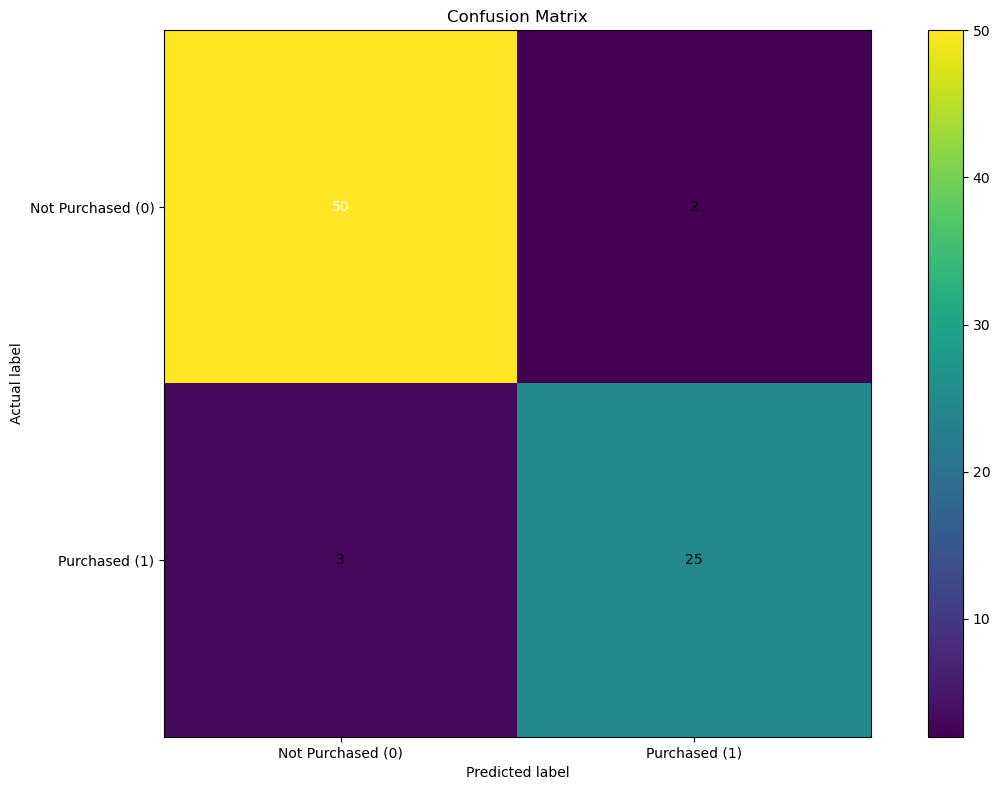

In [53]:
# 5.1 – Biểu đồ trực quan Confusion Matrix

plt.figure(figsize=(12,8))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Purchased (0)', 'Purchased (1)'], rotation=0)
plt.yticks(tick_marks, ['Not Purchased (0)', 'Purchased (1)'])

# Ghi số lên từng ô
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
